 # <center> <h1 style="color:#d48a13">🏡 Ironkaggle  🏡 </h1> </center>

El siguiente proyecto consiste en el análisis de una base de datos que nos habla de viviendas en el condado de King en EEUU y las características de las mismas.

Es interesante saber que el condado de King se encuentra en el estado estadounidense de Washington. Su población según el censo del año 2000 era de 1.737.034, y en el 2007 se estimaba de 1.859.284. Por población el condado de King es el mayor del estado de Washington, y hace el número 14 de los más poblados de todos los Estados Unidos. Es uno de los más avanzados condados en el ámbito educativo de toda la nación y aproximadamente la mitad de su población posee un título universitario.

La sede de condado es la ciudad de Seattle, que también es la mayor ciudad del estado de Washington. Cerca de dos terceras partes de la población habita en los alrededores de la ciudad. El condado de King se encuentra también en el ranking de los 100 condados con mayores ingresos de los Estados Unidos de América.
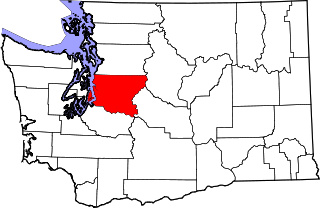 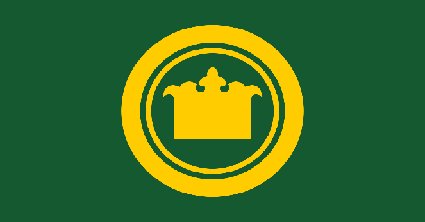


**OBJETIVO** --> price: Nuestro objetivo principal es comprender qué características impactan más significativamente el precio de la vivienda. Además, nuestro objetivo es explorar propiedades valoradas en $650 mil y más para obtener información más detallada.

<h2 style='color:#d48a13'> 0.0 Importación de librerías y herramientas de visualización y de Machine Learning 

In [1]:
#📚 Librerias básicas de visualización y de operaciones matemáticas
import pandas as pd
import numpy as np

#📋 Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


#👾# Machine Learning
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

<h2 style='color:#d48a13'> 01. Extracción de datos, primera visualización y limpieza superficial

In [2]:
data= pd.read_csv('king_ country_ houses.csv')

In [3]:
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


### Leyenda de las columnas
**id:** A unique identifier for a house
.
**date:** The date on which the house was sold.

**price:** The sale price of the house (prediction target).

**bedrooms:** Number of bedrooms in the house.

**bathrooms:** Number of bathrooms in the house, per bedroom.

**sqft_living:** Square footage of the interior living space.

**sqft_lot:** Square footage of the land space.

**floors:** Number of floors (levels) in the house.

**waterfront:** Whether the house has a waterfront view.

**view:** Number of times the house has been viewed.

**condition:** The overall condition of the house.

**grade:** The overall grade given to the house, based on the King County grading system.

**sqft_above:** Square footage of the house apart from the basement.

**sqft_basement:** Square footage of the basement.

**yr_built:** The year the house was built.

**yr_renovated:** The year the house was renovated.

**zipcode:** ZIP code area.

**lat:** Latitude coordinate.

**long:** Longitude coordinate.

**sqft_living15:** The interior living space for the nearest 15 neighbors in 2015.

**sqft_lot15:** The land spaces for the nearest 15 neighbors in 2015.

In [4]:
data.shape

(21613, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
king=data.copy()

In [7]:
king.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [8]:
king['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

**He procedido a unificar estas líneas de código que consiste en unificar enunciados de columnas, cambiar el ID como índice y eliminar nulls y huecos vacios ya que no se han generado cambios.**

In [9]:
king.set_index('id', inplace=True)
king.columns = [column.lower().replace(" ", "_") for column in king.columns]
king.isnull().sum()
king.duplicated().sum()
king.eq(" ").sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Modificación de columnas:

**DATE**

In [10]:
king['date'] = king['date'].astype(str).str.split('T', expand=True)[0]
king['date'] =king['date'].astype(int)

**YR_RENOVATED**

La nueva tabla de renovación hace que se conviertan en una tabla de valores categóricos que van desde el 0 (no renovado) hasta 9 que representa fue renovado en los años 30

In [11]:
king.loc[king['yr_renovated'].isin([2011, 2012, 2013, 2014, 2015]), 'yr_renovated'] = 9
king.loc[king['yr_renovated'].between(2001, 2010), 'yr_renovated'] = 8
king.loc[king['yr_renovated'].between(1991, 2000), 'yr_renovated'] = 7
king.loc[king['yr_renovated'].between(1981, 1990), 'yr_renovated'] = 6
king.loc[king['yr_renovated'].between(1971, 1980), 'yr_renovated'] = 5
king.loc[king['yr_renovated'].between(1961, 1970), 'yr_renovated'] = 4
king.loc[king['yr_renovated'].between(1951, 1960), 'yr_renovated'] = 3
king.loc[king['yr_renovated'].between(1941, 1950), 'yr_renovated'] = 2
king.loc[king['yr_renovated'].between(1931, 1940), 'yr_renovated'] = 1
king['yr_renovated'].value_counts()

yr_renovated
0    20699
8      255
7      192
9      168
6      166
5       58
4       39
3       24
2        9
1        3
Name: count, dtype: int64

<h2 style='color:#d48a13'>02. Inicio del EDA. </h2>

<h3>Primer objetivo. características impactan más significativamente el precio de la vivienda</h3>

In [12]:
king.nunique().sort_values(ascending=False)

sqft_lot         9782
sqft_lot15       8689
lat              5034
price            4028
sqft_living      1038
sqft_above        946
sqft_living15     777
long              752
date              372
sqft_basement     306
yr_built          116
zipcode            70
bathrooms          30
bedrooms           13
grade              12
yr_renovated       10
floors              6
condition           5
view                5
waterfront          2
dtype: int64

**Resultado de esta primera visualización:**

A simple vista puedo pensar que hay algunos elementos categóricos cómo zipcode, bathrooms,bedrooms,grade,floors ,view,condition, 
waterfront. Ya que presentan muy pocas opciones a pesar de la gran cantidad de elementos diferentes que presenta el dataframe  

In [13]:
king.describe().T

,count,mean,std,min,25%,50%,75%,max
date,21613.0,2.014390e+07,4436.582469,2.014050e+07,2.014072e+07,2.014102e+07,2.015022e+07,2.015053e+07
price,21613.0,5.400881e+05,367127.196483,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,0.930062,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,0.770163,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,918.440897,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,41420.511515,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,0.539989,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,0.086517,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,0.766318,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,0.650743,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Checking Distributions

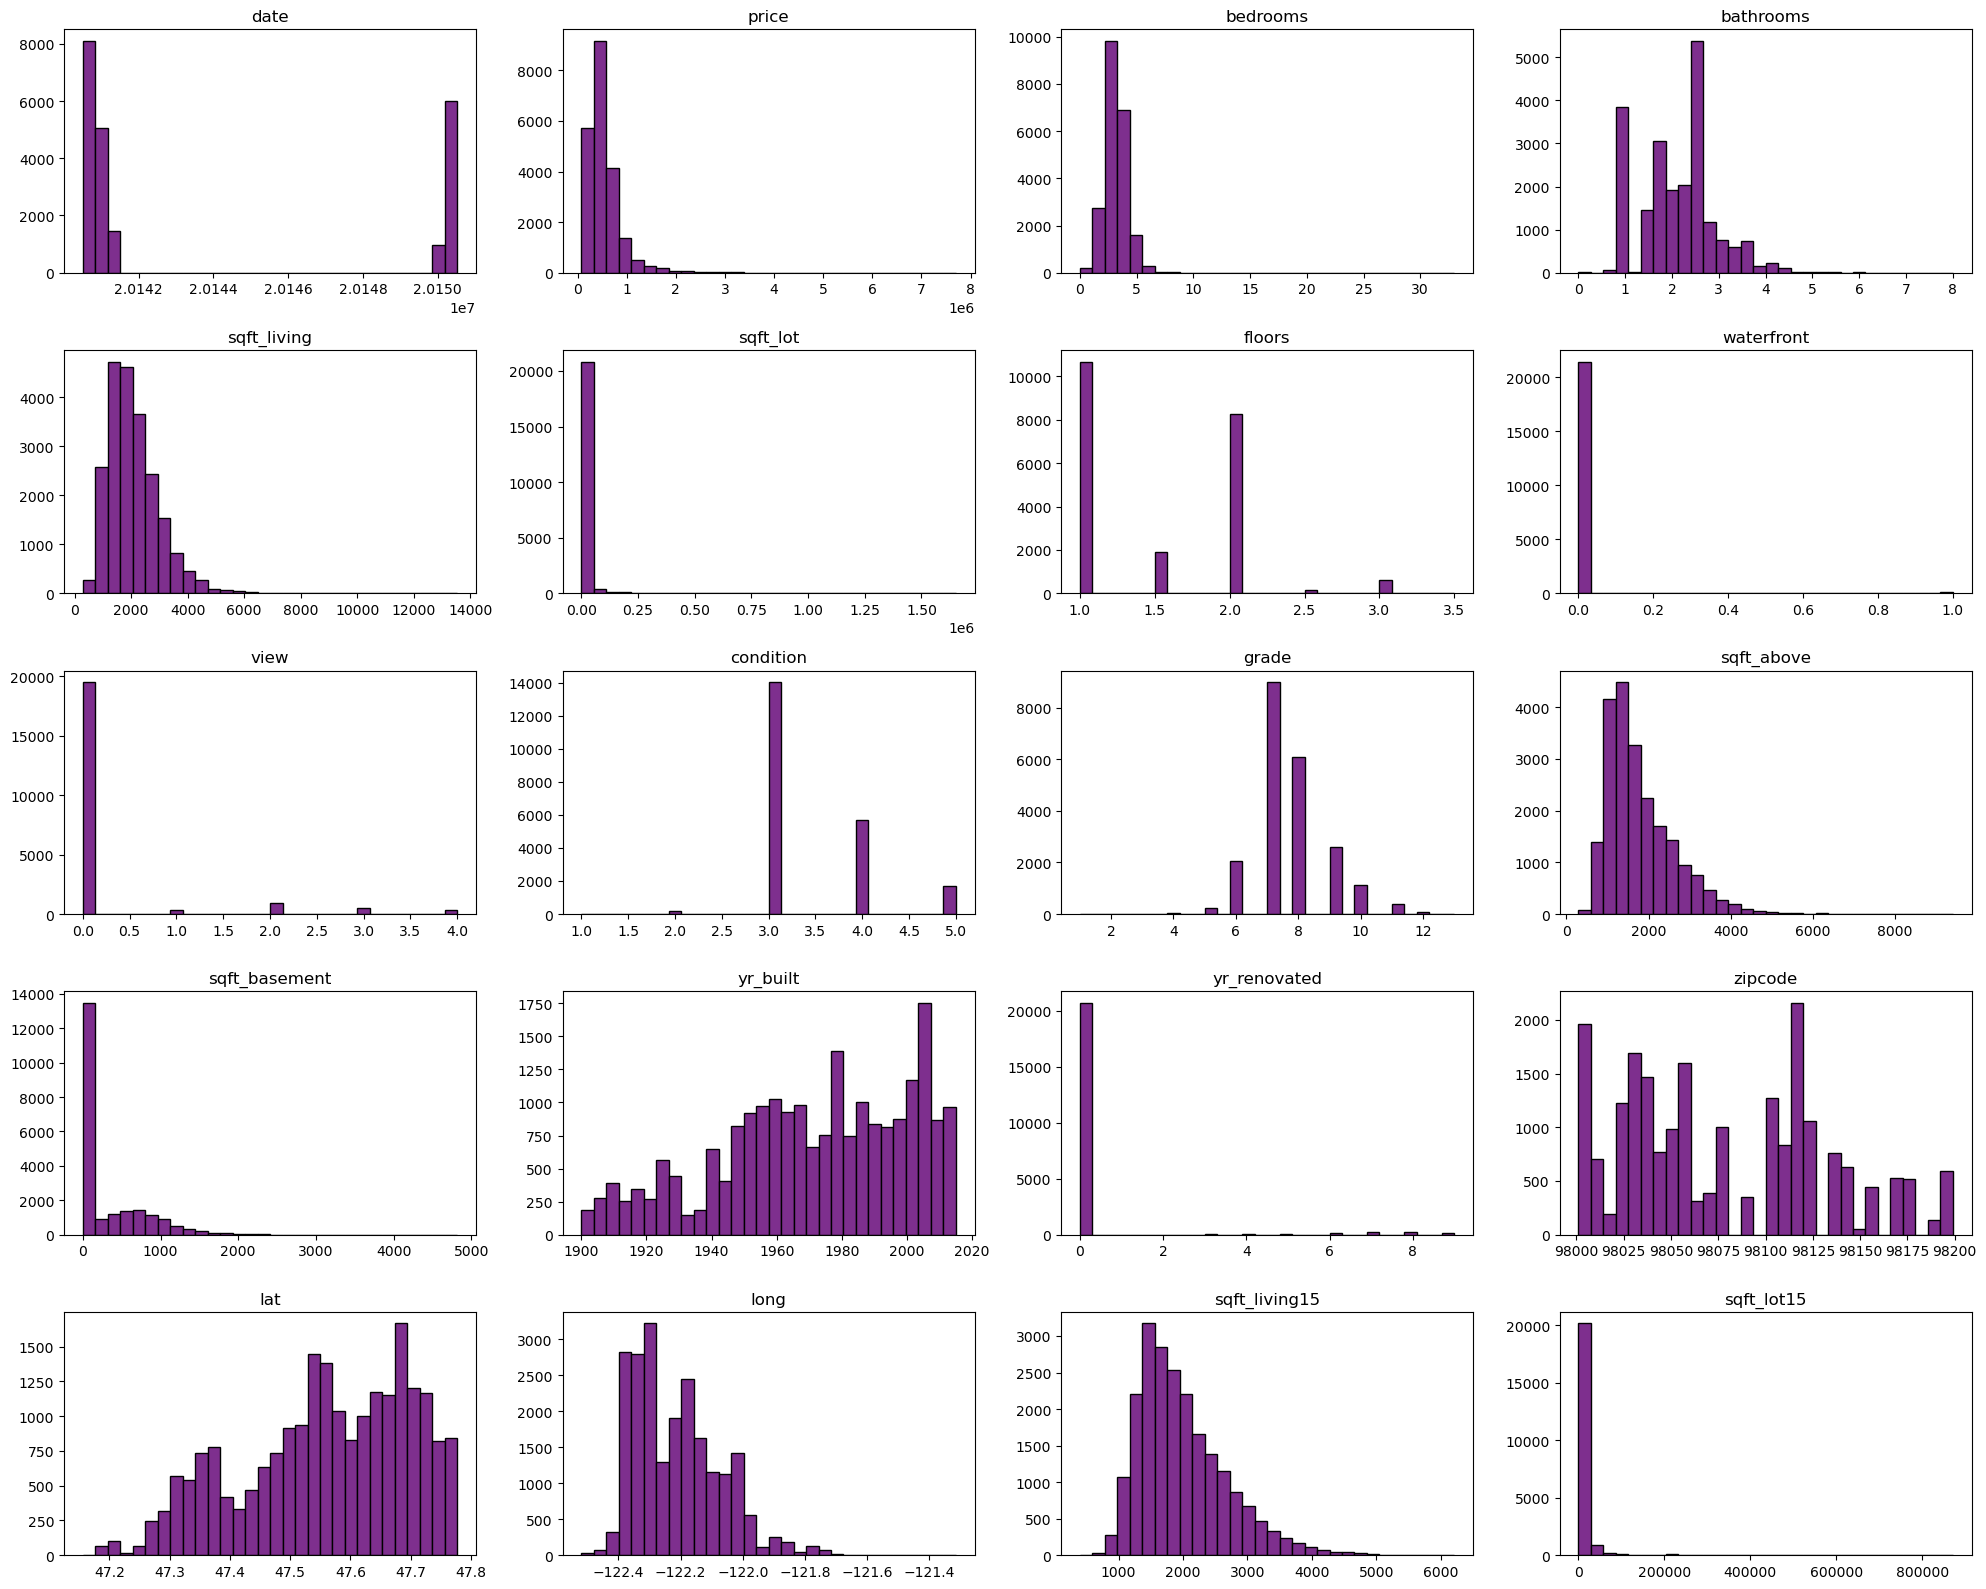

In [14]:
color = "#7E2F8E"

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(king.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(king.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(king.columns[i])

plt.tight_layout()
plt.show()

Con estos histogramas conseguimos una información muy interesante de algunas tablas como puede ser la de renovación, que podrá ser confirmada cuando analicemos los OUTLIERS

Y a continuación vemos la representación del que va a ser nuestra columna de referencia "price"

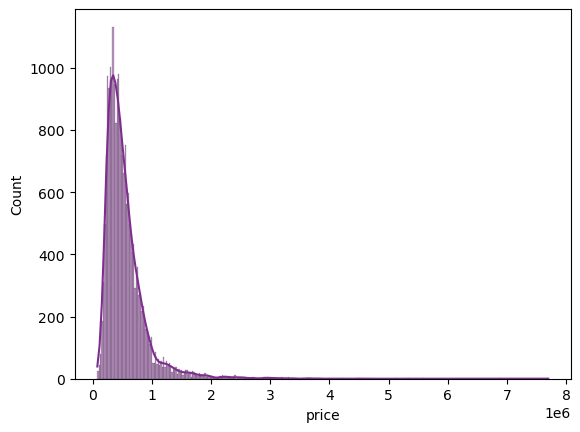

In [15]:
sns.histplot(king["price"], color=color, kde=True);

### Observamos los OUTLIERS

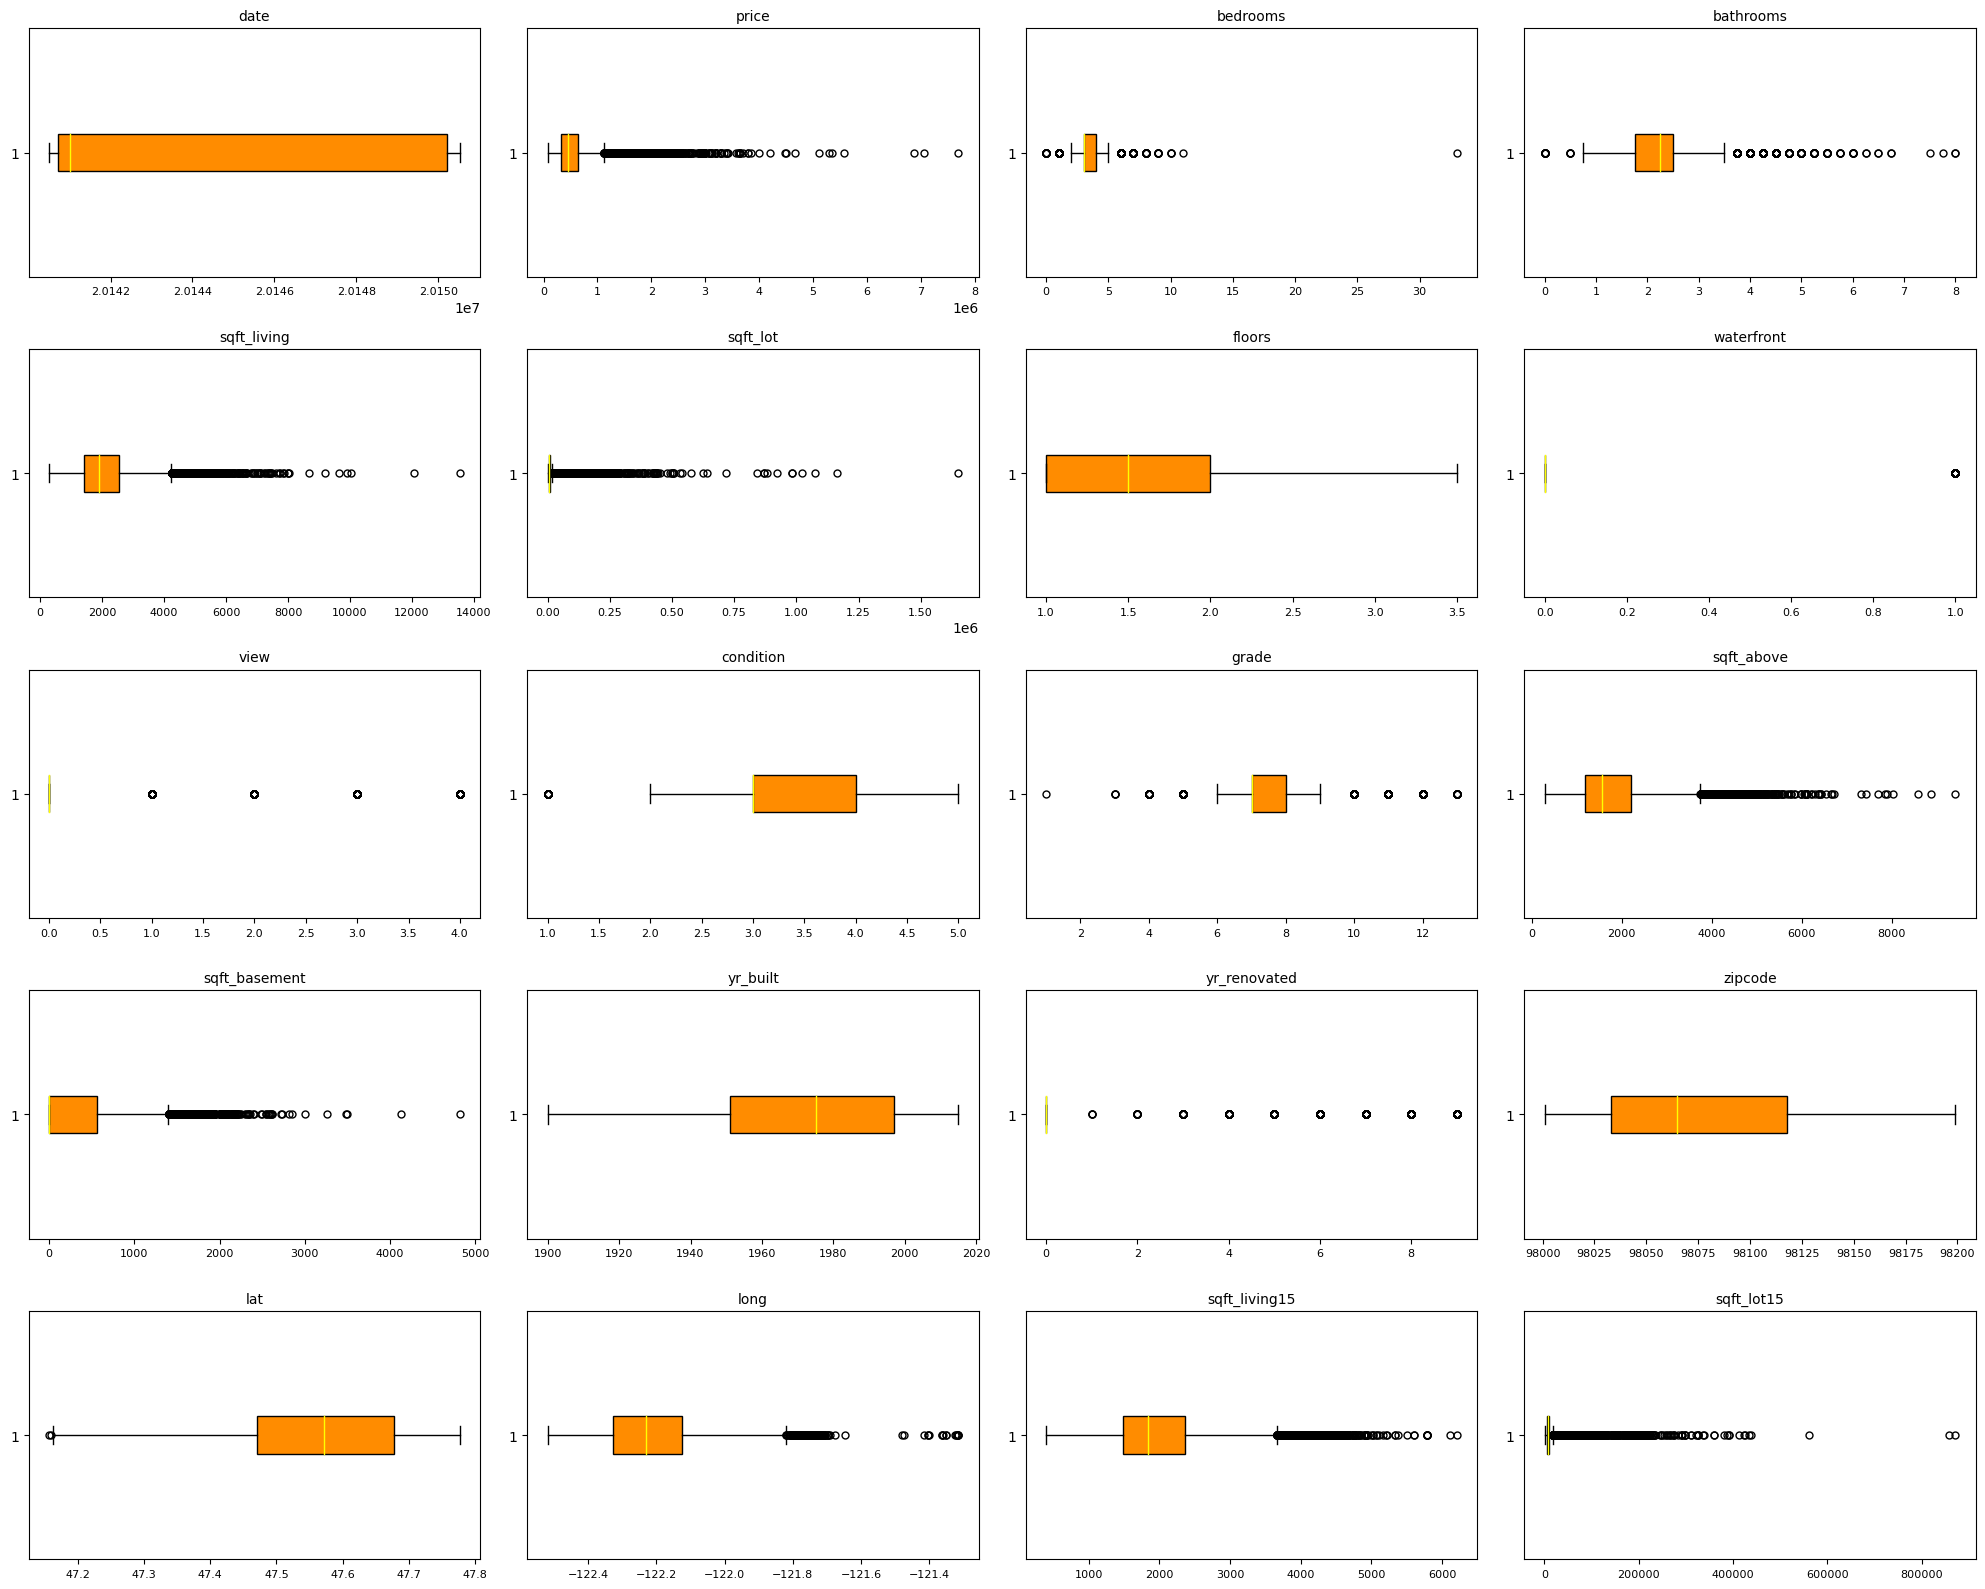

In [16]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(king.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(king.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(king.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

### Buscamos correlaciones

Estas estarán vinculadas al precio de venta

In [17]:
king.corrwith(king["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.132348
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date             0.003033
zipcode         -0.053203
dtype: float64

### Representamos las posibles ¿multicolinealidades? 

Como queremos que "price" se encuentre en la última posición, tendremos que moverla columna primero.

In [18]:
price = 'price'
columna_extraida = king.pop(price)
king[price] = columna_extraida

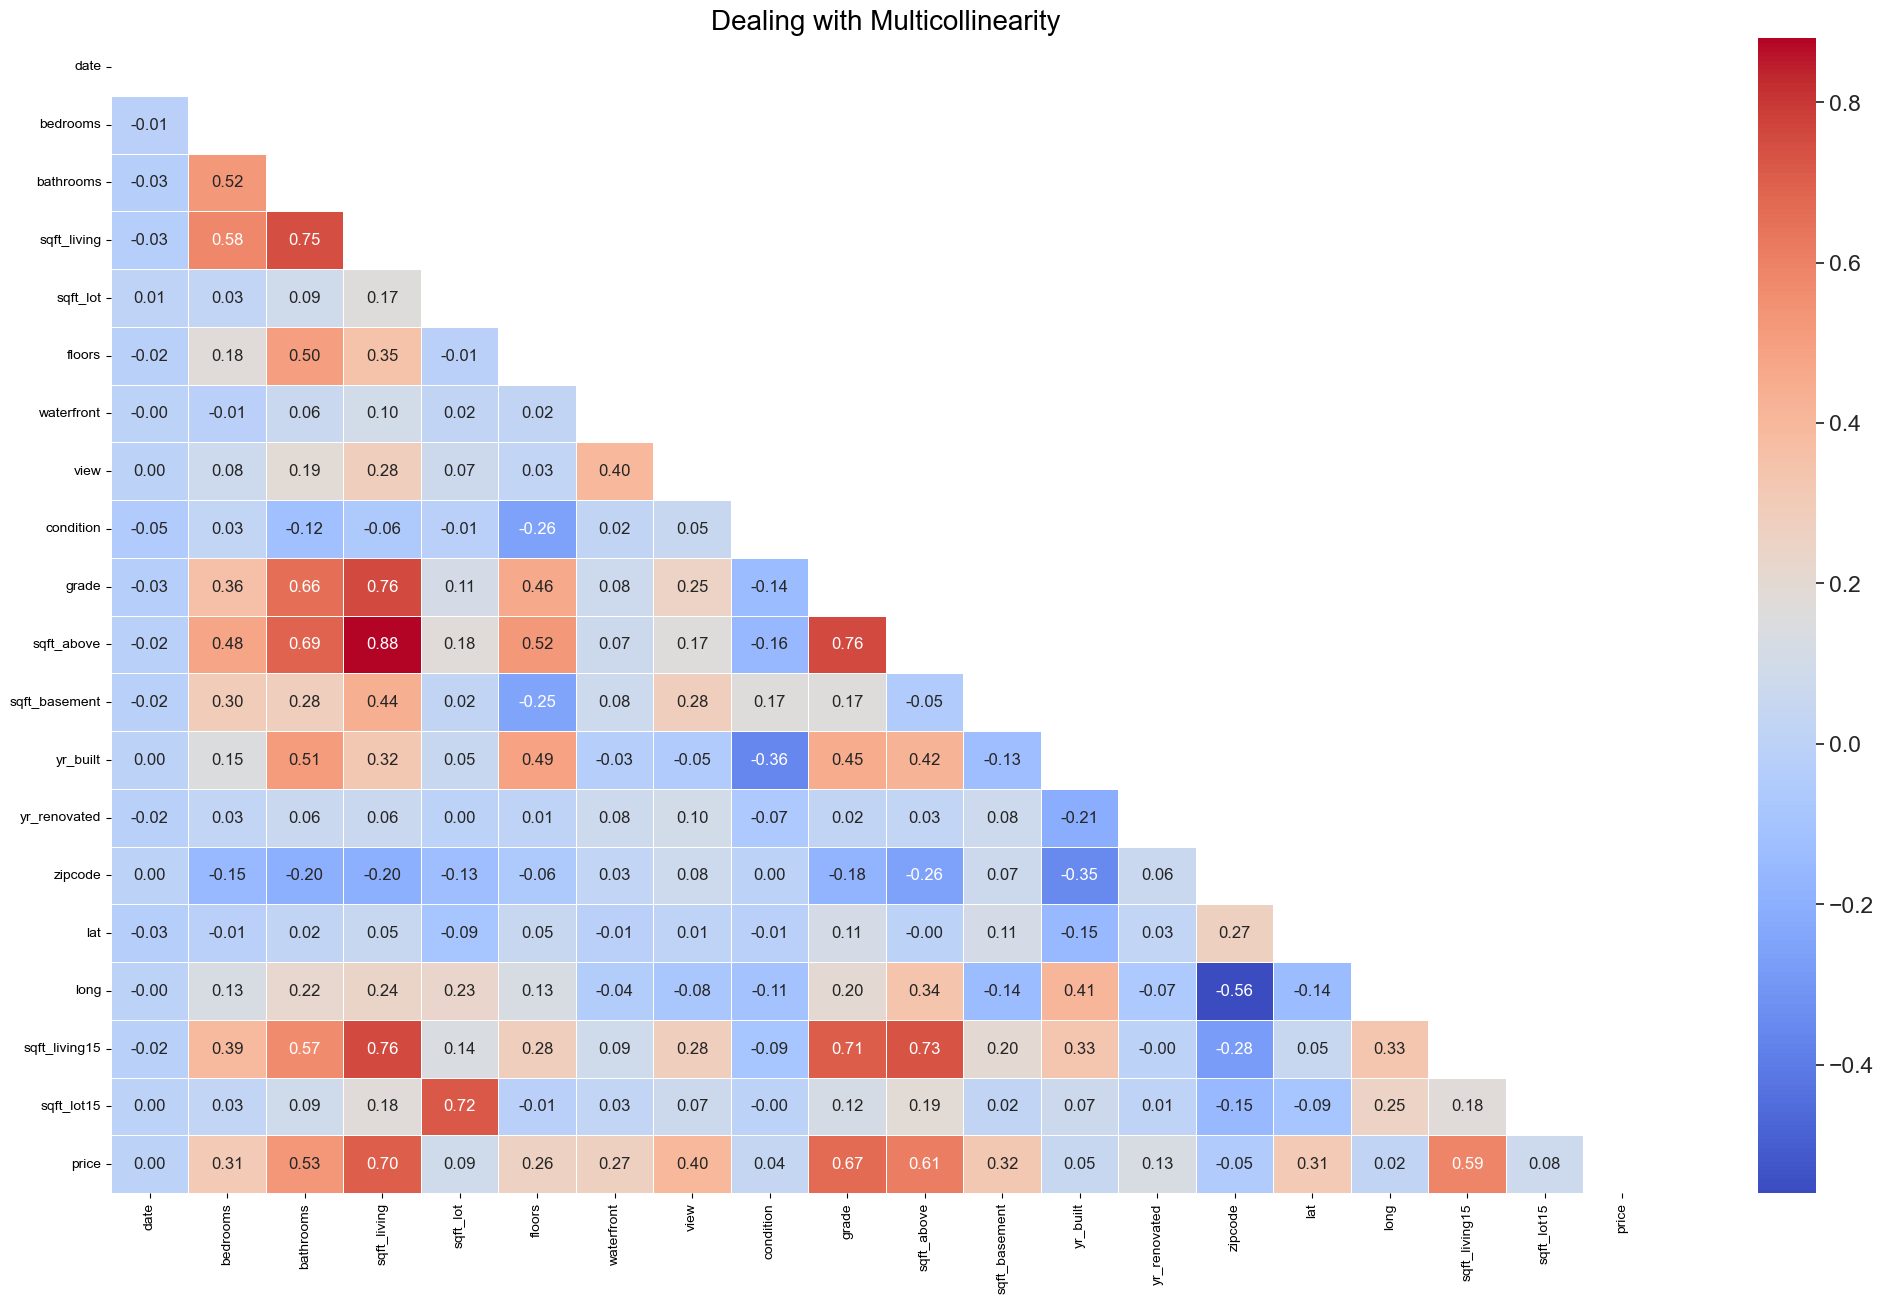

In [19]:
# Correlation Matrix-Heatmap Plot
king_corr = round(king.corr(), 2)

mask = np.zeros_like(king_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(king_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

###### Con los datos obtenidos vemos algunas multicolinealidades importantes como "sqft_living", "grade" y "sqft_abode". Por lo que nos podría resultar interesante en el futuro eliminar dichas columnas.

<h2 style='color:#d48a13'> 03. PROCESAMIENTO DE LOS DATOS

In [20]:
#Normalizamos las columnas
minimos = king.min()
maximos = king.max()
king = (king - minimos) / (maximos - minimos)

#Eliminamos los outlier
def outlier_slayer(data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

outlier_slayer(king)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,0.050973,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.0,0.893939,0.571498,0.217608,0.161934,0.005742,0.019266
5631500400,0.969875,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.0,0.136364,0.936143,0.237542,0.399415,0.008513,0.013770
2487200875,0.070524,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.0,0.681818,0.586939,0.104651,0.165376,0.004996,0.069377
1954400510,0.969177,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.0,0.368687,0.741354,0.393688,0.241094,0.007871,0.057049
1321400060,0.012469,0.090909,0.28125,0.107547,0.003816,0.4,0.0,0.0,0.5,0.500000,0.156250,0.000000,0.826087,0.0,0.010101,0.247386,0.159468,0.316469,0.007085,0.023934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,0.001895,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,0.5,0.583333,0.135965,0.000000,0.947826,0.0,0.515152,0.874055,0.143688,0.194631,0.000986,0.037377
6600060120,0.969676,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,0.5,0.583333,0.221491,0.000000,0.991304,0.0,0.732323,0.570693,0.130399,0.246257,0.007523,0.042623
1523300141,0.012070,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,0.5,0.500000,0.080044,0.000000,0.947826,0.0,0.722222,0.705324,0.182724,0.106866,0.001558,0.042898


### 03.1 X-y Split

In [74]:
columnas_a_eliminar=["sqft_living","sqft_above" , "bathrooms", 'price']

X = king.drop(columnas_a_eliminar, axis=1)
y = king["price"]

### 03.2 Creación del modelo

### 03.2.1 Train-Test Split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
print(f'100% of our data: {len(king)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 21613.
80% for training data: 15129.
20% for test data: 6484.


### 03.2.2 Selecting the Model: Linear Regression

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 03.2.2.1 Modelo de  Validacion

In [78]:
predictionslr = model.predict(X_test)
print(f'20% for test prediction data: {len(predictionslr)}.')

20% for test prediction data: 6484.


### 03.2.2.2 Métricas.

In [79]:
r2_lr = r2_score(y_test, predictionslr)
RMSE_lr = root_mean_squared_error(y_test, predictionslr)
MSE_lr = mean_squared_error(y_test, predictionslr)
MAE_lr = mean_absolute_error(y_test, predictionslr)

print("R2 = ", round(r2_lr, 4))
print("RMSE = ", round(RMSE_lr, 4))
print("The value of the metric MSE is ", round(MSE_lr, 4))
print("MAE = ", round(MAE_lr, 4))

R2 =  0.6615
RMSE =  0.029
The value of the metric MSE is  0.0008
MAE =  0.0173


### 03.2.3 Selecting the Model: Ridge

In [80]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

### 03.2.3.1 Modelo de Validacion

In [81]:
predictions_ridge = ridge.predict(X_test)

### 03.2.3.2 Métricas

In [82]:
r2_rg = r2_score(y_test, predictions_ridge)
RMSE_rg = root_mean_squared_error(y_test, predictions_ridge)
MSE_rg = mean_squared_error(y_test, predictions_ridge)  
MAE_rg = mean_absolute_error(y_test, predictions_ridge)


print("R2 = ", round(r2_rg, 4))
print("RMSE = ", round(RMSE_rg, 4))
print("The value of the metric MSE is ", round(MSE_rg, 4))
print("MAE = ", round(MAE_rg, 4))

R2 =  0.6613
RMSE =  0.029
The value of the metric MSE is  0.0008
MAE =  0.0173


### 03.2.4 Selecting the Model: Lasso Regression

In [83]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

### 03.2.4.1 Modelo de Validacion

In [84]:
predictions_lasso = lasso.predict(X_test)

### 03.2.4.2 Métricas

In [85]:
r2_ls = r2_score(y_test, predictions_lasso)
RMSE_ls = root_mean_squared_error(y_test, predictions_lasso)
MSE_ls = mean_squared_error(y_test, predictions_lasso) 
MAE_ls = mean_absolute_error(y_test, predictions_lasso)

#Printing the results
print("R2 = ", round(r2_ls, 4))
print("RMSE = ", round(RMSE_ls, 4))
print("The value of the metric MSE is ", round(MSE_ls, 4))
print("MAE = ", round(MAE_ls, 4))

R2 =  -0.0005
RMSE =  0.0498
The value of the metric MSE is  0.0025
MAE =  0.0312


### 03.2.5 Selecting the Model: KNN Regresion

In [33]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

### 03.2.5.1 Modelo de Validacion

In [34]:
predictions_knn = knn.predict(X_test)

### 03.2.5.2 Métricas

In [35]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = root_mean_squared_error(y_test, predictions_knn)
MSE_knn = mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

#Printing the results
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.7067
RMSE =  0.027
The value of the metric MSE is  0.0007
MAE =  0.0132


### 03.2.6 Selecting the Model: XGBoost Regression

In [36]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

### 03.2.6.1 Modelo de Validacion

In [37]:
predictions_xgb = xgbr.predict(X_test)

### 03.2.6.2 Métricas

In [38]:
r2_xg = r2_score(y_test, predictions_xgb)
RMSE_xg = root_mean_squared_error(y_test, predictions_xgb)
MSE_xg = mean_squared_error(y_test, predictions_xgb)
MAE_xg = mean_absolute_error(y_test, predictions_xgb)

print("R2 = ", round(r2_xg, 4))
print("RMSE = ", round(RMSE_xg, 4))
print("The value of the metric MSE is ", round(MSE_xg, 4))
print("MAE = ", round(MAE_xg, 4))

R2 =  0.7811
RMSE =  0.0233
The value of the metric MSE is  0.0005
MAE =  0.0137


### 03.2.7 Selecting the Model: Decision Tree

In [39]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

### 03.2.7.1 Modelo de Validación

In [40]:
predictions_tree = tree.predict(X_test)

### 03.2.7.2 Métricas

In [41]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = root_mean_squared_error(y_test, predictions_tree)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  0.6221
RMSE =  0.0306
The value of the metric MSE is  0.0009
MAE =  0.0149


### 03.3. Comparación

In [42]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso',  'KNN', 'XGBoost','Decision Tree'],
    'R²': [r2_lr, r2_rg, r2_ls, r2_knn, r2_xg, r2_tree],
    'RMSE': [RMSE_lr, RMSE_rg, RMSE_ls, RMSE_knn, RMSE_xg, RMSE_tree],
    'MSE': [MSE_lr, MSE_rg, MSE_ls, MSE_knn, MSE_xg, MSE_tree],
    'MAE': [MAE_lr, MAE_rg, MAE_ls, MAE_knn, MAE_xg, MAE_tree]
}

df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,KNN,XGBoost,Decision Tree
R²,0.661472,0.661344,-0.000461,0.706721,0.781137,0.622099
RMSE,0.028993,0.028998,0.049842,0.026986,0.023312,0.030633
MSE,0.000841,0.000841,0.002484,0.000728,0.000543,0.000938
MAE,0.017324,0.017292,0.031170,0.013235,0.013725,0.014920


<h2 style='color:#d48a13'>04 Reporting

In [43]:
series_pred = pd.Series(predictions_xgb, name='predictions')
series_y_test = pd.Series(y_test, name='actual')
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)
comparison_df.head(20)

,actual,predictions
0,0.038033,0.042617
1,0.103607,0.076695
2,0.126295,0.145965
3,0.185574,0.302082
4,0.083410,0.088767
5,0.017836,0.024637
6,0.093770,0.089758
7,0.079344,0.066105
8,0.040590,0.050459
9,0.069508,0.063953


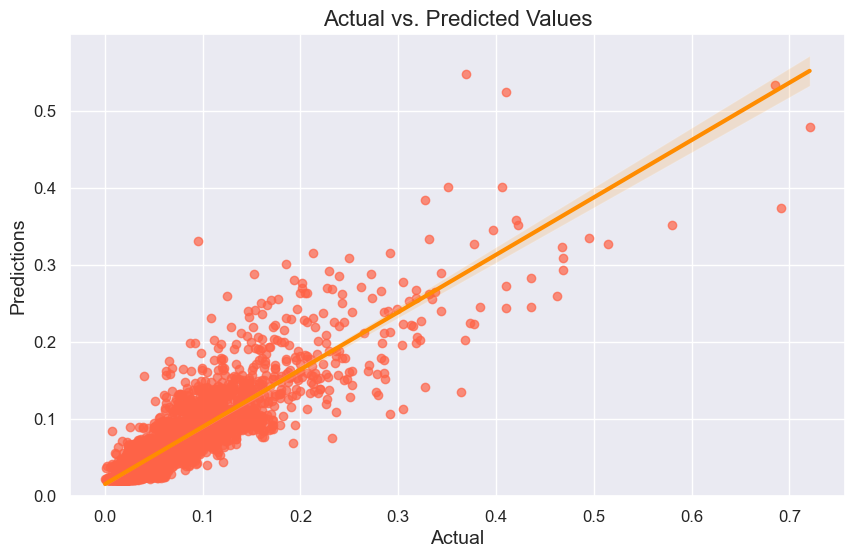

In [44]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='predictions', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h2 style='color:#d48a13'>05. Objetivo 2: explorar propiedades valoradas en $650 mil y más para obtener información más detallada.

In [45]:
caras=data[data['price'] >= 650000]

In [86]:
caras.shape

(5324, 20)

**Hemos disminuido la muestra casi un 75%**

In [46]:
caras.set_index('id', inplace=True)

In [47]:
caras.loc[:, 'date'] = caras['date'].astype(str).str.split('T', expand=True)[0]

In [48]:
caras['date'] = caras['date'].astype(int)

C:\Users\USR\AppData\Local\Temp\ipykernel_5816\1165815554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caras['date'] = caras['date'].astype(int)


In [49]:
caras.loc[:, 'price'] = caras['price'] / 100

In [64]:
caras.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
date,5324.0,20143881.28,4438.78,20140502.00,20140716.00,20141013.00,20150219.00,20150527.00
price,5324.0,9906.62,4777.45,6500.00,7250.00,8300.00,10500.00,77000.00
bedrooms,5324.0,3.82,0.90,0.00,3.00,4.00,4.00,10.00
bathrooms,5324.0,2.68,0.79,0.00,2.25,2.50,3.25,8.00
sqft_living,5324.0,3005.20,1028.65,890.00,2330.00,2890.00,3510.00,13540.00
sqft_lot,5324.0,21273.95,60229.81,520.00,5400.00,8580.00,14406.50,1651359.00
floors,5324.0,1.71,0.50,1.00,1.00,2.00,2.00,3.50
waterfront,5324.0,0.03,0.16,0.00,0.00,0.00,0.00,1.00
view,5324.0,0.63,1.20,0.00,0.00,0.00,0.00,4.00
condition,5324.0,3.46,0.69,1.00,3.00,3.00,4.00,5.00


In [51]:
caras.corrwith(caras["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.606785
grade            0.507540
sqft_above       0.466491
bathrooms        0.463425
sqft_living15    0.373555
view             0.339276
waterfront       0.311155
sqft_basement    0.286972
bedrooms         0.200773
floors           0.126395
yr_renovated     0.107088
sqft_lot15       0.038211
sqft_lot         0.032126
yr_built         0.031424
date             0.008239
condition        0.003919
lat             -0.010190
long            -0.082112
zipcode         -0.083414
dtype: float64

**1º. -Situación del mercado inmobiliario en el momento.**

Tenemos que encuadras primeramente el contexto en el que estamos. Post Gran Reseción, muy vinculada al sector inmobiliario pero a su vez están llegando al condado grandes empresas tecnológicas (empleados con gran poder adquisitivo) a una misma zona.

Esto aumentó vertiginósamente los precios de la vivienda y se ha estado luchando con medidas diversas para poder evitar la rápida escalada de precios.

Para llevar a cabo dicha exploración voy a intentar crear un prototipo de las casas que estan por encima de dicho precio.
Por la información que he encontrado en internet, los elementos más importantes para la revalorización de una vivienda son:

-Situación del mercado inmobiliario en el momento.

-Ubicación. Al no conocer la realidad de la ciudad será complicado sacar conclusiones o entender perfectamente que hace que esos sitios sean más caros que otros. Aunque en la correlación anterior nos dice que no influye nada.

-Años de construcción.

-Tamaño.

-Estado/renovación.


Con esta información lo que llevaré a cabo será un análisis de cada uno de estos elementos y quizas podamos realizar hipótesis a raiz de sus correlaciones.

**2º. Ubicación, pero para ello, en primer lugar creamos un nuevo Dataframe con la información filtrada**

La ubicación nos enseñara la densidad de oferta y el precio medio de los inmuebles en relación a la zona

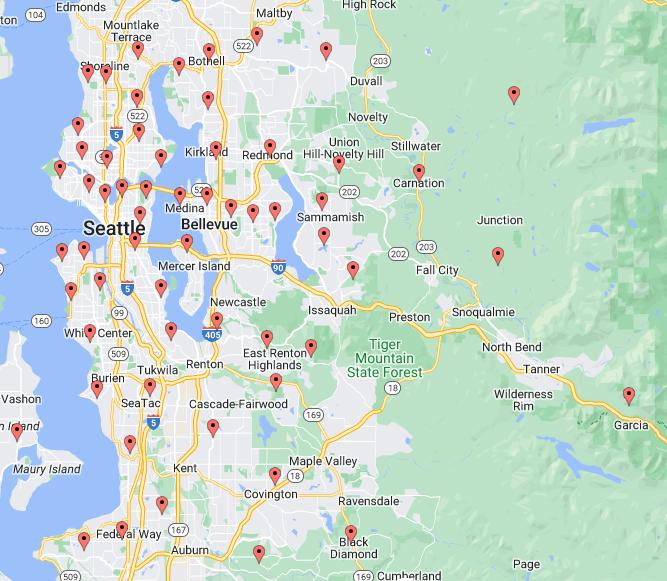

In [54]:
caras1=caras["zipcode"].head(30)
caras2=caras["zipcode"].tail(33)

<Axes: xlabel='zipcode', ylabel='price'>

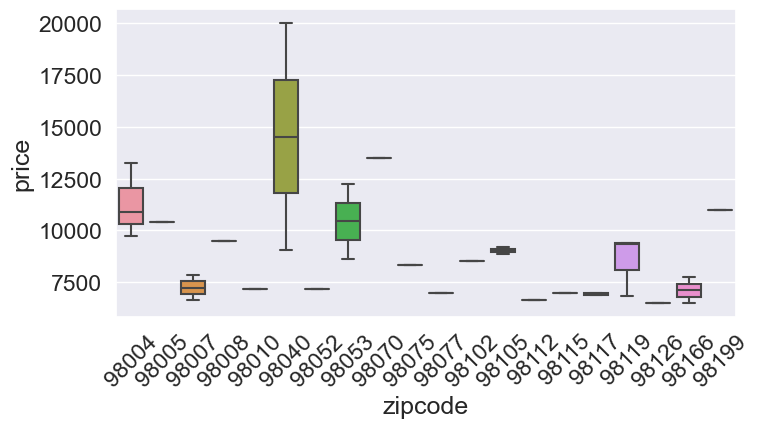

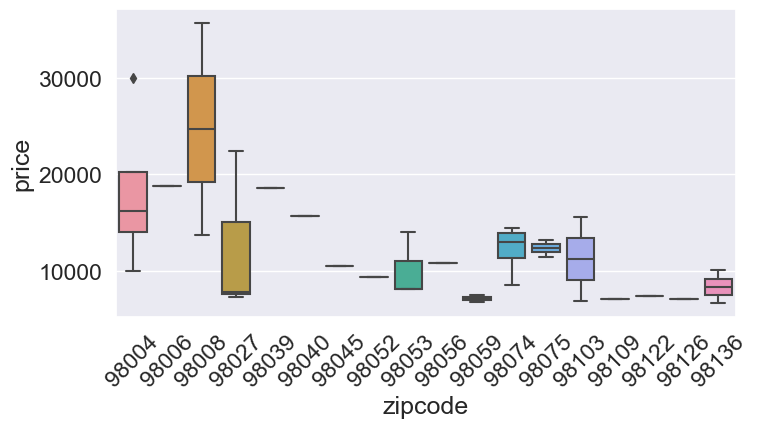

In [55]:
plt.figure(figsize=(8, 4))
plt.xticks(caras1,rotation=45)
sns.boxplot( x=caras1, y=caras["price"] )


plt.figure(figsize=(8, 4))
plt.xticks(caras2,rotation=45)
sns.boxplot( x=caras2, y=caras["price"] )


Gran dispersión de los códigos postales aunque se ve una gran tendencia a las zonas urbanas. 

-Aqui podríamos ver una interesante correlación entre mayor número de vivivendas a la venta en un código postal y el tamaño de las mismas.

<Axes: xlabel='zipcode', ylabel='sqft_lot'>

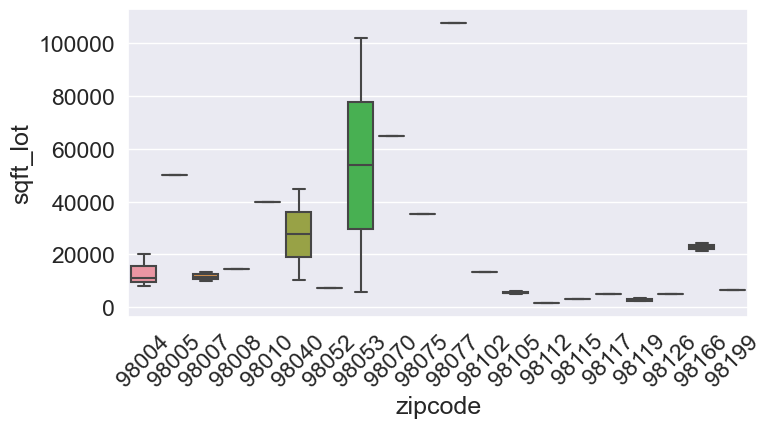

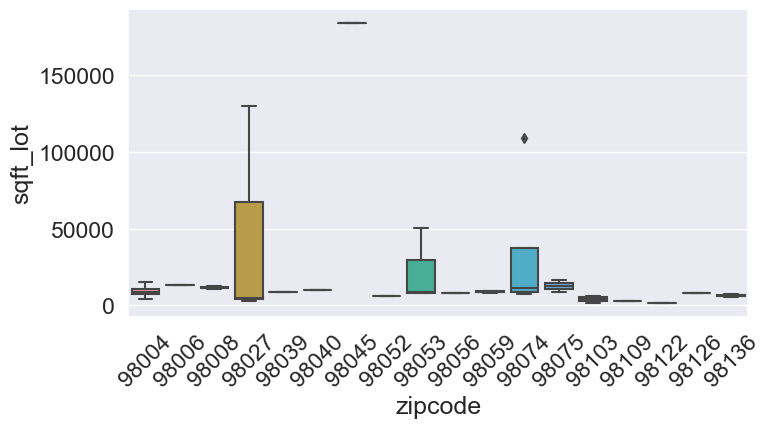

In [56]:
plt.figure(figsize=(8, 4))
plt.xticks(caras1,rotation=45)
sns.boxplot( x=caras1, y=caras["sqft_lot"] )


plt.figure(figsize=(8, 4))
plt.xticks(caras2,rotation=45)
sns.boxplot( x=caras2, y=caras["sqft_lot"] )

**3ª. Año de construcción.**

Se va a poder ver en el siguiente plot la relación entre precio y año de construcción. Para ello unificaremos las fechas por décadas en primer lugar

In [57]:
caras.loc[caras['yr_built'].isin([2011, 2012, 2013, 2014, 2015]), 'yr_built'] = 2011
caras.loc[caras['yr_built'].between(2001, 2010), 'yr_built'] = 2001
caras.loc[caras['yr_built'].between(1991, 2000), 'yr_built'] = 1991
caras.loc[caras['yr_built'].between(1981, 1990), 'yr_built'] = 1981
caras.loc[caras['yr_built'].between(1971, 1980), 'yr_built'] = 1971
caras.loc[caras['yr_built'].between(1961, 1970), 'yr_built'] = 1961
caras.loc[caras['yr_built'].between(1951, 1960), 'yr_built'] = 1951
caras.loc[caras['yr_built'].between(1941, 1950), 'yr_built'] = 1941
caras.loc[caras['yr_built'].between(1931, 1940), 'yr_built'] = 1931
caras.loc[caras['yr_built'].between(1921, 1930), 'yr_built'] = 1921
caras.loc[caras['yr_built'].between(1911, 1920), 'yr_built'] = 1911
caras.loc[caras['yr_built'].between(1901, 1910), 'yr_built'] = 1901
caras.loc[caras['yr_built'].between(1891, 1900), 'yr_built'] = 1891

In [58]:
caras.groupby('yr_built')['price'].agg(['count', 'mean']).round()

,count,mean
yr_built,,
1891,27,9204.0
1901,247,10285.0
1911,230,9324.0
1921,382,9634.0
1931,176,11090.0
1941,261,9491.0
1951,483,9489.0
1961,395,9837.0
1971,454,9415.0


<Axes: xlabel='yr_built', ylabel='price'>

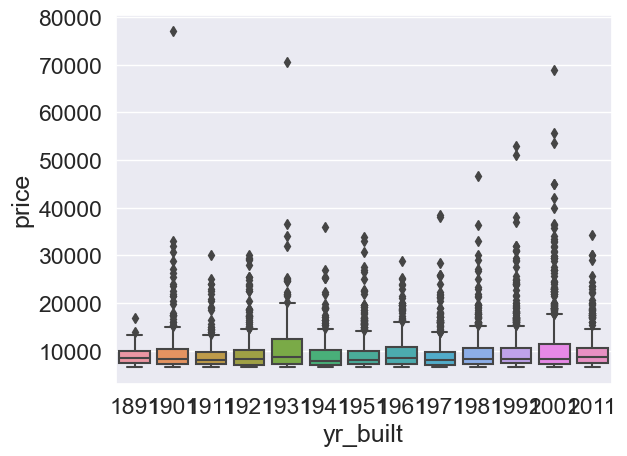

In [59]:
sns.boxplot( x=caras["yr_built"], y=caras["price"] )

**4ª. Tamaño de la vivienda.**

Se ha visto a lo largo de todo el dataframe que el tamaño es de los elementos más influyentes con el precio.

**5ª. Estado /Renovación.**

El concepto de "grade" es otorgado por las organizaciones públicas y divide automáticamente las casas en categorías. 
Contra más alta esta categoría el precio será mayor.
Se puede observar que el código postal no influye en la categoría de la casa.

In [93]:
caras.groupby('grade')['price'].agg(['count', 'mean']).round()

,count,mean
grade,,
5,4,7358.0
6,32,7935.0
7,682,7607.0
8,1456,8334.0
9,1636,9304.0
10,1019,11312.0
11,392,15134.0
12,90,21912.0
13,13,37096.0


In [92]:
doble=caras.groupby([ "grade",'zipcode'])
a=doble['price'].sum()
a.reset_index()

,grade,zipcode,price
0,5,98075,7750.0
1,5,98106,7950.0
2,5,98116,7150.0
3,5,98136,6580.0
4,6,98004,51122.5
...,...,...,...
318,13,98039,124550.0
319,13,98059,17800.0
320,13,98102,101790.0
321,13,98177,91030.0


In [102]:
caras2 = data.copy()
caras2=caras2[caras2['price'] >= 650000]

Para analizar el precio en relación a la renovación, voy a realizar una nueva tabla que sea una representación de la diferencia entre el año de construcción y la renovación de la misma. Y que el resultado vincularlo posteriormente con los precios.

In [103]:
caras2['cons-renov'] = caras2['yr_renovated']-caras2['yr_built']

In [104]:
caras2.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cons-renov
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,-2001
10,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,-1965
15,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,1980,970,1979,0,98126,47.5714,-122.375,2140,4000,-1979
21,2524049179,20140826T000000,2000000.0,3,2.75,3050,44867,1.0,0,4,...,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,-1968
26,1794500383,20140626T000000,937000.0,3,1.75,2450,2691,2.0,0,0,...,1750,700,1915,0,98119,47.6386,-122.360,1760,3573,-1915
27,3303700376,20141201T000000,667000.0,3,1.00,1400,1581,1.5,0,0,...,1400,0,1909,0,98112,47.6221,-122.314,1860,3861,-1909
29,1873100390,20150302T000000,719000.0,4,2.50,2570,7173,2.0,0,0,...,2570,0,2005,0,98052,47.7073,-122.110,2630,6026,-2005
32,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,-1929
35,9547205180,20140613T000000,696000.0,3,2.50,2300,3060,1.5,0,0,...,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264,72
41,7766200013,20140811T000000,775000.0,4,2.25,4220,24186,1.0,0,0,...,2600,1620,1984,0,98166,47.4450,-122.347,2410,30617,-1984


In [108]:
caras3 = caras2.groupby('cons-renov')['price'].agg(['count', 'mean']).round()
caras3.sort_values(by='mean', ascending=False).head(10)

,count,mean
cons-renov,,
14,1,2500000.0
26,5,2318200.0
10,1,2160000.0
11,1,2150000.0
77,8,1741438.0
61,12,1705375.0
71,3,1703667.0
13,1,1702500.0
16,1,1650000.0
